# Unsupervised Machine Learning Clustering 

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data and renaming columns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import warnings


warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)


In [4]:
%matplotlib inline

In [5]:
# Define path

path = '/Users/matthewmacbook/Documents/CareerFoundry/Data Immersion/Achievement 6 - Advanced Analytics and Dashboard Design/COVID-19 Public Transit Project'


In [6]:
# Import data

df_commuter_transit = pd.read_csv(os.path.join(path, 'Datasets', 'Transformed Data', 'commuter_transit_master_2018_to_2022.csv'))


In [7]:
df_commuter_transit.head()

,UZA Name,UACE Code,Year,Transit Trips,Transit Vehicle Miles,"Commute by Car, Truck, or Van",Commute by Drove alone,Commute by Carpooled,Commute by 2-person Carpool,Commute by 3-person Carpool,Commute by 4-or-more-person Carpool,Average Number of Workers per Car,Commute by Public Transportation,Commute by Walking,Commute by Bicycle,"Commute by Taxicab, Motorcycle, or Other means",Commute by Work from Home,Commute Time <10 Minutes,Commute Time 10 to 14 Minutes,Commute Time 15 to 19 Minutes,Commute Time 20 to 24 Minutes,Commute Time 25 to 29 Minutes,Commute Time 30 to 34 Minutes,Commute Time 35 to 44 Minutes,Commute Time 45 to 59 Minutes,Commute Time >60 Minutes,Mean Commute Time,Depart Time 12:00 a.m. to 4:59 a.m.,Depart Time 5:00 a.m. to 5:29 a.m.,Depart Time 5:30 a.m. to 5:59 a.m.,Depart Time 6:00 a.m. to 6:29 a.m.,Depart Time 6:30 a.m. to 6:59 a.m.,Depart Time 7:00 a.m. to 7:29 a.m.,Depart Time 7:30 a.m. to 7:59 a.m.,Depart Time 8:00 a.m. to 8:29 a.m.,Depart Time 8:30 a.m. to 8:59 a.m.,Depart Time 9:00 a.m. to 11:59 p.m.,Workers 16 Years and Over in Households,Households with 0 Vehicles available,Households with 1 Vehicle Available,Households with 2 Vehicles Available,Households with 3 or More Vehicles Available,Worked in State of Residence,Worked in County of Residence,Worked Outside County of Residence,Worked Outside State of Residence,Living in a Place,Worked in Place of Residence,Worked Outside Place of Residence,Not living in a place,Average Number of Vehicles per Household,Population,Housing Units,Land Area,Population Density
0,"Abilene, TX",280,2018,0,0,91.3,76.7,14.6,10.3,2.3,2.0,1.10,0.1,1.6,0.0,1.2,5.7,24.8,29.7,26.2,11.0,0.5,3.4,0.7,1.2,2.6,15.2,5.5,2.4,5.0,4.1,9.1,13.7,20.0,8.4,6.2,25.4,54675,2.9,27.3,46.2,23.6,99.8,94.0,5.8,0.2,99.6,88.7,10.9,0.4,1.905,118138,50514,61.97,1906.4
1,"Abilene, TX",280,2019,0,0,90.6,79.9,10.7,8.2,1.9,0.6,1.07,0.2,1.9,0.6,1.0,5.6,24.9,25.4,29.6,11.8,1.4,3.3,0.6,1.7,1.3,14.6,5.0,2.2,4.0,6.1,9.3,12.2,18.2,10.9,6.6,25.3,54753,2.4,20.6,50.3,26.7,99.6,95.8,3.8,0.4,99.6,90.7,8.9,0.4,2.013,118138,50514,61.97,1906.4
2,"Abilene, TX",280,2020,0,0,89.8,78.8,11.0,8.3,1.5,1.2,1.07,0.8,2.4,0.2,0.7,6.1,24.4,27.7,26.3,11.0,1.4,3.7,0.8,1.3,3.3,16.0,5.8,2.2,4.6,4.9,9.5,12.4,19.8,9.1,5.6,26.3,54839,2.7,23.3,48.3,25.7,99.8,93.5,6.3,0.2,99.4,88.6,10.8,0.6,1.970,118138,50514,61.97,1906.4
3,"Abilene, TX",280,2022,0,0,87.7,77.8,9.9,7.3,1.6,0.9,1.07,0.9,2.1,0.0,1.0,8.4,21.1,28.6,27.1,14.3,2.7,2.3,1.2,1.2,1.6,14.9,3.4,2.4,3.6,6.5,13.2,12.2,19.9,8.2,6.1,24.6,59559,2.9,21.8,47.8,27.5,97.3,93.9,3.3,2.7,99.8,90.8,9.0,0.2,1.999,118138,50514,61.97,1906.4
4,"Akron, OH",766,2018,6365983,7530163,90.1,82.4,7.7,5.5,1.3,0.8,1.05,2.0,2.0,0.3,0.6,5.1,12.5,15.2,16.4,17.9,9.4,12.1,6.3,6.1,4.2,23.1,3.4,2.9,5.3,9.1,11.5,14.6,11.6,10.2,5.0,26.4,272448,4.0,19.6,45.2,31.2,99.4,70.9,28.5,0.6,84.9,26.4,58.5,15.1,2.036,541879,251080,300.64,1802.4


In [8]:
# Filter commuter_transit data to only include urban areas with a population over 500000

df_commuter_transit_big = df_commuter_transit[df_commuter_transit['Population'] > 500000]

In [9]:
df_commuter_transit_big.shape

(393, 55)

In [10]:
columns_to_drop = [
    'UZA Name', 
    'Commute by Drove alone',
    'Commute by Carpooled', 
    'Commute by 2-person Carpool', 
    'Commute by 3-person Carpool', 
    'Commute by 4-or-more-person Carpool', 
    'Average Number of Workers per Car',
    'Commute by Taxicab, Motorcycle, or Other means', 
    'Commute Time <10 Minutes',
    'Commute Time 10 to 14 Minutes',
    'Commute Time 15 to 19 Minutes',
    'Commute Time 20 to 24 Minutes',
    'Commute Time 25 to 29 Minutes',
    'Commute Time 30 to 34 Minutes',
    'Commute Time 35 to 44 Minutes',
    'Commute Time 45 to 59 Minutes',
    'Commute Time >60 Minutes',
    'Depart Time 12:00 a.m. to 4:59 a.m.',
    'Depart Time 5:00 a.m. to 5:29 a.m.',
    'Depart Time 5:30 a.m. to 5:59 a.m.',
    'Depart Time 6:00 a.m. to 6:29 a.m.',
    'Depart Time 6:30 a.m. to 6:59 a.m.',
    'Depart Time 7:00 a.m. to 7:29 a.m.',
    'Depart Time 7:30 a.m. to 7:59 a.m.',
    'Depart Time 8:00 a.m. to 8:29 a.m.',
    'Depart Time 8:30 a.m. to 8:59 a.m.',
    'Depart Time 9:00 a.m. to 11:59 p.m.',
    'Households with 0 Vehicles available',
    'Households with 1 Vehicle Available',
    'Households with 2 Vehicles Available',
    'Households with 3 or More Vehicles Available',
    'Worked in State of Residence',
    'Worked in County of Residence',
    'Worked Outside County of Residence',
    'Worked Outside State of Residence',
    'Living in a Place',
    'Worked in Place of Residence',
    'Worked Outside Place of Residence',
    'Not living in a place'
    
    
]


df_commuter_transit_big.drop(columns = columns_to_drop, inplace = True)

In [11]:
df_commuter_transit_big.head()

,UACE Code,Year,Transit Trips,Transit Vehicle Miles,"Commute by Car, Truck, or Van",Commute by Public Transportation,Commute by Walking,Commute by Bicycle,Commute by Work from Home,Mean Commute Time,Workers 16 Years and Over in Households,Average Number of Vehicles per Household,Population,Housing Units,Land Area,Population Density
4,766,2018,6365983,7530163,90.1,2.0,2.0,0.3,5.1,23.1,272448,2.036,541879,251080,300.64,1802.4
5,766,2019,6574247,7559746,92.0,1.2,1.9,0.0,4.0,23.2,273848,2.054,541879,251080,300.64,1802.4
6,766,2020,3702550,5790589,90.2,1.3,1.6,0.1,6.1,23.0,271238,2.041,541879,251080,300.64,1802.4
7,766,2021,3430256,5885010,82.5,1.0,2.0,0.2,13.6,22.4,261643,1.997,541879,251080,300.64,1802.4
8,766,2022,4292745,5814150,82.2,0.7,1.9,0.2,14.0,23.4,260968,1.985,541879,251080,300.64,1802.4


### 2. The elbow technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(df_commuter_transit_big).score(df_commuter_transit_big) for i in range(len(kmeans))] 
# Creates a score that represents a rate of variation for the given cluster option.

score

[-5.748614769738101e+19,
 -9.031721150395015e+18,
 -4.3909848900783754e+18,
 -1.502335824297409e+18,
 -9.732309906090222e+17,
 -5.328707994822821e+17,
 -3.509081983505061e+17,
 -2.3908309823490854e+17,
 -1.8296844440023747e+17]

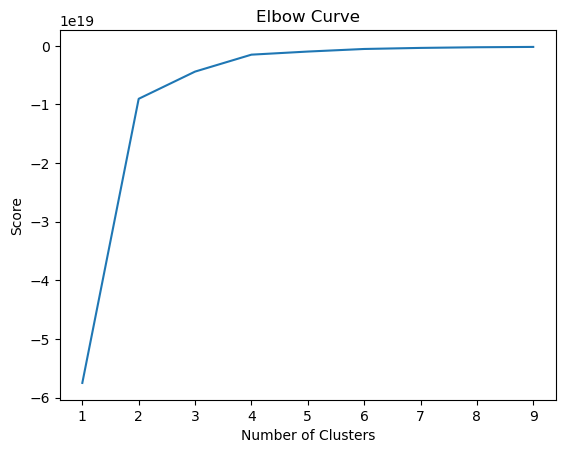

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 3. k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


I chose 4 as the number of clusters as there is a significant difference between a small cluster of urban areas compared to others. Therefore, I wanted to include an additional grouping of urban areas that differs from the main large group and the small cluster.

In [16]:
# Fit the k-means object to the data.

kmeans.fit(df_commuter_transit_big)

KMeans(n_clusters=4)

In [17]:
df_commuter_transit_big['clusters'] = kmeans.fit_predict(df_commuter_transit_big)

In [18]:
df_commuter_transit_big.head()

,UACE Code,Year,Transit Trips,Transit Vehicle Miles,"Commute by Car, Truck, or Van",Commute by Public Transportation,Commute by Walking,Commute by Bicycle,Commute by Work from Home,Mean Commute Time,Workers 16 Years and Over in Households,Average Number of Vehicles per Household,Population,Housing Units,Land Area,Population Density,clusters
4,766,2018,6365983,7530163,90.1,2.0,2.0,0.3,5.1,23.1,272448,2.036,541879,251080,300.64,1802.4,0
5,766,2019,6574247,7559746,92.0,1.2,1.9,0.0,4.0,23.2,273848,2.054,541879,251080,300.64,1802.4,0
6,766,2020,3702550,5790589,90.2,1.3,1.6,0.1,6.1,23.0,271238,2.041,541879,251080,300.64,1802.4,0
7,766,2021,3430256,5885010,82.5,1.0,2.0,0.2,13.6,22.4,261643,1.997,541879,251080,300.64,1802.4,0
8,766,2022,4292745,5814150,82.2,0.7,1.9,0.2,14.0,23.4,260968,1.985,541879,251080,300.64,1802.4,0


In [19]:
df_commuter_transit_big['clusters'].value_counts()

0    364
3     24
2      3
1      2
Name: clusters, dtype: int64

In [20]:
df_commuter_transit_big[df_commuter_transit_big['clusters']==3]

,UACE Code,Year,Transit Trips,Transit Vehicle Miles,"Commute by Car, Truck, or Van",Commute by Public Transportation,Commute by Walking,Commute by Bicycle,Commute by Work from Home,Mean Commute Time,Workers 16 Years and Over in Households,Average Number of Vehicles per Household,Population,Housing Units,Land Area,Population Density,clusters
185,9271,2018,377843361,102562241,72.1,14.3,5.9,1.2,5.2,32.2,2337639,1.871,4382009,1792967,1655.89,2646.3,3
186,9271,2019,373619884,102441299,71.7,14.5,5.9,1.2,5.3,32.8,2380308,1.861,4382009,1792967,1655.89,2646.3,3
189,9271,2022,219105930,88024787,62.4,8.9,4.9,1.1,20.7,30.1,2284087,1.822,4382009,1792967,1655.89,2646.3,3
274,16264,2018,575381540,243671790,76.5,13.1,2.9,0.7,5.5,32.4,4255908,1.914,8671746,3559615,2337.89,3709.2,3
275,16264,2019,554219960,243751516,75.4,13.5,3.2,0.6,5.8,32.6,4262934,1.904,8671746,3559615,2337.89,3709.2,3
276,16264,2020,232463055,203730145,74.7,12.3,3.0,0.7,8.0,31.9,4195594,1.913,8671746,3559615,2337.89,3709.2,3
277,16264,2021,227095964,206917967,67.2,5.3,2.8,0.6,22.3,29.1,4124102,1.898,8671746,3559615,2337.89,3709.2,3
278,16264,2022,286343525,204269167,69.4,7.7,2.7,0.7,18.0,30.4,4254833,1.865,8671746,3559615,2337.89,3709.2,3
833,51445,2018,547368592,266250733,84.5,5.0,2.6,0.7,5.6,31.2,6124228,2.133,12237376,4354341,1636.83,7476.3,3
834,51445,2019,528012651,265424494,84.2,4.9,2.5,0.7,5.9,31.7,6196935,2.144,12237376,4354341,1636.83,7476.3,3


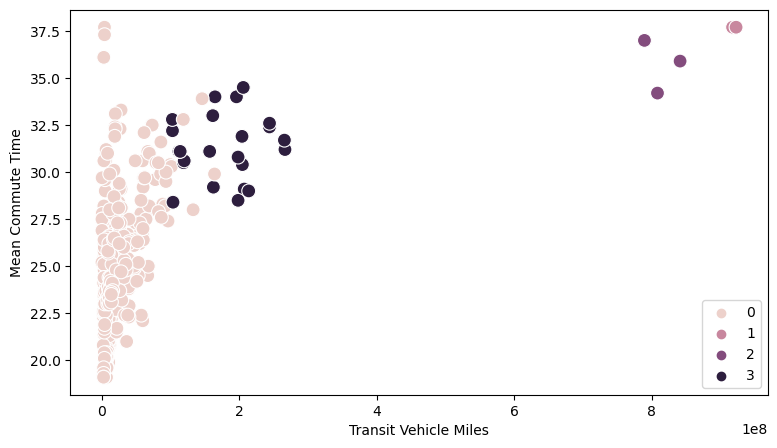

In [21]:
# Plot the clusters for the "Transit Vehicle Miles" and "Mean Commute Time" variables.

plt.figure(figsize=(9,5))
ax = sns.scatterplot(x=df_commuter_transit_big['Transit Vehicle Miles'], y=df_commuter_transit_big['Mean Commute Time'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Transit Vehicle Miles') # Label x-axis.
plt.ylabel('Mean Commute Time') # Label y-axis.
plt.show()

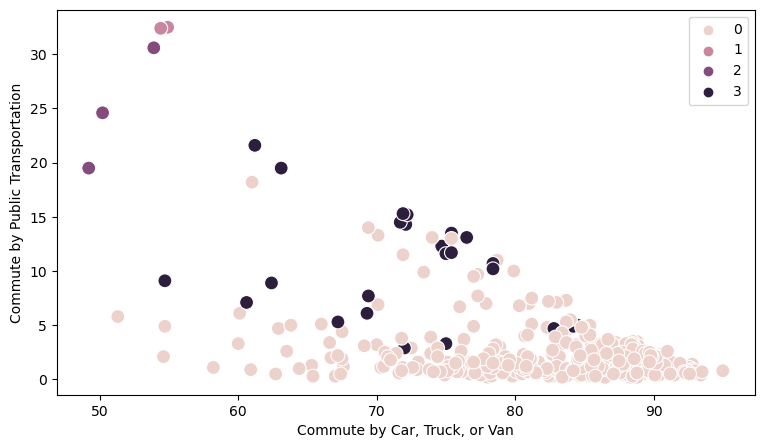

In [22]:
# Plot the clusters for the "Commute by Car, Truck, or Van" and "Commute by Public Transportation" variables.

plt.figure(figsize=(9,5))
ax = sns.scatterplot(x=df_commuter_transit_big['Commute by Car, Truck, or Van'], y=df_commuter_transit_big['Commute by Public Transportation'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Commute by Car, Truck, or Van') # Label x-axis.
plt.ylabel('Commute by Public Transportation') # Label y-axis.
plt.show()

We see that the major difference between the clusters is transit vehicle miles and mean commute time. The purple and dark purple clusters represent the New York urban area which is a siginificantly different city compared to other American cities when it comes to commuter tendencies. 

New York City has significantly more transit vehicle miles. In addition, the many commuters in New York City do not use a car and instead use public transportation.

As for the lgiht pink cluster, we see that their transit vehicle miles and mean commute time are higher on average than the vast majority of the pink cluster. 

In [23]:
df_commuter_transit_big.loc[df_commuter_transit_big['clusters'] == 3, 'cluster'] = 'dark purple'
df_commuter_transit_big.loc[df_commuter_transit_big['clusters'] == 2, 'cluster'] = 'purple'
df_commuter_transit_big.loc[df_commuter_transit_big['clusters'] == 1, 'cluster'] = 'pink'
df_commuter_transit_big.loc[df_commuter_transit_big['clusters'] == 0, 'cluster'] = 'light pink'

In [24]:
aggregated_data = df_commuter_transit_big.groupby('cluster').agg({'Transit Trips':['mean', 'median'], 
                         'Transit Vehicle Miles':['mean', 'median'],
                         'Commute by Car, Truck, or Van':['mean', 'median'],
                         'Commute by Public Transportation':['mean', 'median'],
                         'Commute by Work from Home':['mean', 'median'],
                         'Mean Commute Time':['mean', 'median'],
                         'Average Number of Vehicles per Household':['mean', 'median'],
                         'Population':['mean', 'median'],
                         'Population Density':['mean', 'median']})

# Round the values to two decimal places
aggregated_data = aggregated_data.round(2)

In [25]:
aggregated_data

Transit Trips               Transit Vehicle Miles               \
                     mean        median                  mean       median   
cluster                                                                      
dark purple  3.488545e+08  3.340510e+08          1.728998e+08  180052322.5   
light pink   2.414860e+07  1.075212e+07          2.182897e+07   11303521.5   
pink         4.244891e+09  4.244891e+09          9.200516e+08  920051602.0   
purple       2.281273e+09  2.123008e+09          8.128821e+08  808239815.0   

            Commute by Car, Truck, or Van         \
                                     mean median   
cluster                                            
dark purple                         72.00  72.15   
light pink                          82.82  85.00   
pink                                54.65  54.65   
purple                              51.10  50.20   

            Commute by Public Transportation        Commute by Work from Home  \
                                        mean median                      mean   
cluster                                                                         
dark purple                            10.35  10.45                     11.30   
light pink                              2.21   1.60                     11.17   
pink                                   32.45  32.45                      4.60   
purple                                 24.90  24.60                     15.43   

                   Mean Commute Time         \
            median              mean median   
cluster                                       
dark purple   6.70             31.26   31.1   
light pink    8.25             25.01   24.6   
pink          4.60             37.70   37.7   
purple       16.20             35.70   35.9   

            Average Number of Vehicles per Household          Population  \
                                                mean median         mean   
cluster                                                                    
dark purple                                     1.94   1.91   6997504.58   
light pink                                      2.04   2.04   1648387.69   
pink                                            1.48   1.48  19426449.00   
purple                                          1.48   1.49  19426449.00   

                        Population Density          
                 median               mean  median  
cluster                                             
dark purple   5696125.0            4691.85  3709.2  
light pink    1106646.0            2844.46  2430.8  
pink         19426449.0            5980.80  5980.8  
purple       19426449.0            5980.80  5980.8

The results of these k-mean clustering showcase that the light pink cluster is an interesting cluster to compare to the main group. 

This light pink cluster has a signifcantly higher average population and popluation density compared to the pink cluster. It also has a lower percentage of commuters by car. So, does this mean that low commuting by car indicates high population density or reverse? Or, they are correlated but not caused by each other. 

Because it is clear that New York is very different from the rest of American cites, the light pink cluster should be analyzed further to understand how and why those cities differ from the rest of the United States.